# Problem Statement

This dataset has details about cricket matches, such as the teams that played, 
the players involved, the match results, and the locations. 
The goal is to explore the data to find patterns, understand what factors affect 
match outcomes, and gain insights into team and player performances.

# Column Description

id :- A unique identifier for each match.

season :- The year in which the match took place.

city :- The city where the match was played.

date :- The date of the match.

team1 :- The name of the first competing team.

team2 :- The name of the second competing team.

toss_winner :- The team that won the toss.

toss_decision :- The toss winner's decision (bat or field).

result :- The type of result (e.g., normal, tie, no result).

dl_applied :- Whether the Duckworth-Lewis method was applied (0 or 1). 

winner :- The team that won the match.

win_by_runs :- Margin of victory by runs (if applicable).

win_by_wickets :- Margin of victory by wickets (if applicable).

player_of_match :- Name of the player awarded "Player of the Match."

venue :- The stadium where the match was held.

umpire1, umpire2, umpire3 :- Names of the umpires.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
cricket_data = pd.read_csv("D:\Data_Set\matches.csv",encoding = 'unicode_escape')
cricket_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [86]:
cricket_data.shape

(755, 18)

In [19]:
cricket_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [20]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               755 non-null    int64 
 1   season           755 non-null    int64 
 2   city             748 non-null    object
 3   date             755 non-null    object
 4   team1            755 non-null    object
 5   team2            755 non-null    object
 6   toss_winner      755 non-null    object
 7   toss_decision    755 non-null    object
 8   result           755 non-null    object
 9   dl_applied       755 non-null    int64 
 10  winner           751 non-null    object
 11  win_by_runs      755 non-null    int64 
 12  win_by_wickets   755 non-null    int64 
 13  player_of_match  751 non-null    object
 14  venue            755 non-null    object
 15  umpire1          753 non-null    object
 16  umpire2          753 non-null    object
 17  umpire3          118 non-null    ob

In [21]:
cricket_data.isna().sum() # for missing value

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [25]:
cricket_data['city']=cricket_data['city'].fillna (cricket_data['city'].mode()[0])

In [26]:
cricket_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,755.000000,755.000000,755.000000,755.000000,755.000000
mean,1779.433113,2013.437086,0.025166,13.299338,3.354967
std,3448.993305,3.363039,0.156732,23.482437,3.388009
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.500000,2011.000000,0.000000,0.000000,0.000000
50%,378.000000,2013.000000,0.000000,0.000000,4.000000
75%,566.500000,2016.000000,0.000000,19.000000,6.000000
max,11414.000000,2019.000000,1.000000,146.000000,10.000000


In [24]:
cricket_data.duplicated().sum() # for duplicate value

np.int64(0)

In [27]:
cricket_data['date']=pd.to_datetime(cricket_data['date'],format='mixed') # for changing the data type of the date column

In [28]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               755 non-null    int64         
 1   season           755 non-null    int64         
 2   city             755 non-null    object        
 3   date             755 non-null    datetime64[ns]
 4   team1            755 non-null    object        
 5   team2            755 non-null    object        
 6   toss_winner      755 non-null    object        
 7   toss_decision    755 non-null    object        
 8   result           755 non-null    object        
 9   dl_applied       755 non-null    int64         
 10  winner           751 non-null    object        
 11  win_by_runs      755 non-null    int64         
 12  win_by_wickets   755 non-null    int64         
 13  player_of_match  751 non-null    object        
 14  venue            755 non-null    object   

In [29]:
cricket_data['year']=cricket_data['date'].dt.year  # saperating the date column in 3 parts(year,month,and day)
cricket_data['month']=cricket_data['date'].dt.month_name()
cricket_data['Day']=cricket_data['date'].dt.day_name()

In [30]:
cricket_data.drop(['date'],axis=1,inplace=True) #droped the date column for confusion after the seperation

In [31]:
cricket_data.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,Day
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,May,Thursday
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,June,Sunday
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,July,Tuesday
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,August,Friday
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,August,Friday


In [27]:
cricket_data.shape

(755, 18)

In [57]:
# finding the outlier from the data

In [90]:
ipl=cricket_data.select_dtypes(exclude='object')
ipl

,id,season,dl_applied,win_by_runs,win_by_wickets
0,1,2017,0,35,0
1,2,2017,0,0,7
2,3,2017,0,0,10
3,4,2017,0,0,6
4,5,2017,0,15,0
...,...,...,...,...,...
750,11346,2019,0,0,6
751,11347,2019,0,0,9
752,11412,2019,0,0,6
753,11413,2019,0,0,2


# finding outlier

<Axes: xlabel='id'>

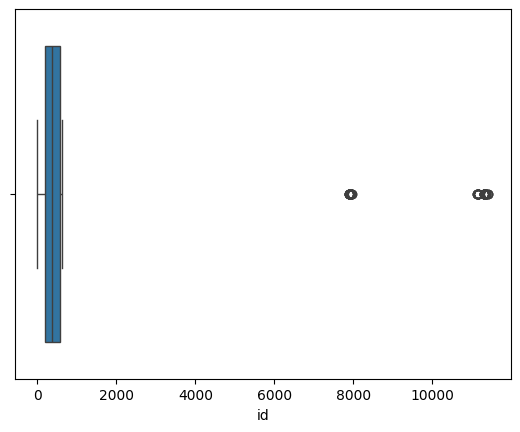

In [91]:
sns.boxplot(x='id',data=cricket_data)

In [92]:
cricket_data['season'].isnull().sum().mean()

np.float64(0.0)

<Axes: xlabel='season'>

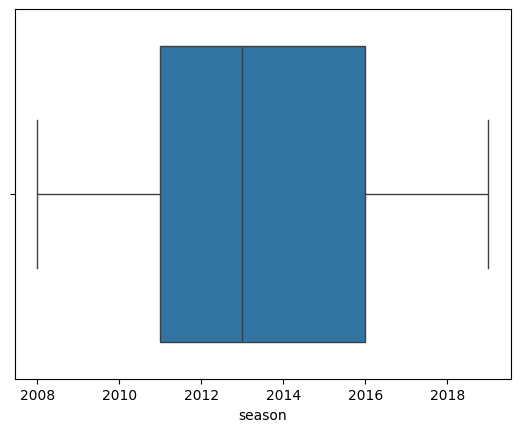

In [93]:
sns.boxplot(x='season', data=cricket_data)

<Axes: xlabel='dl_applied'>

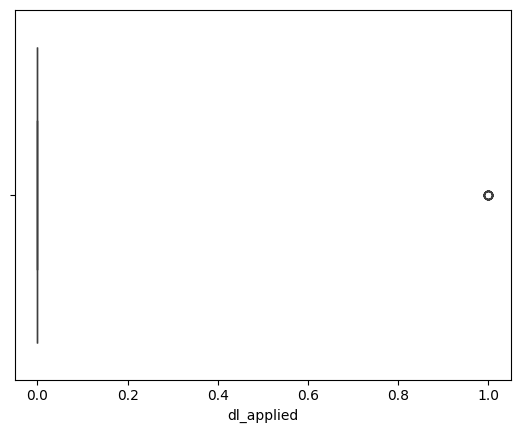

In [64]:
sns.boxplot(x='dl_applied',data=cricket_data)

<Axes: xlabel='win_by_runs'>

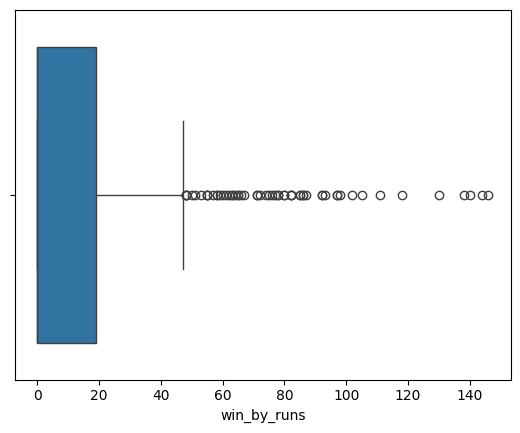

In [65]:
sns.boxplot(x='win_by_runs',data=cricket_data)

<Axes: xlabel='win_by_wickets'>

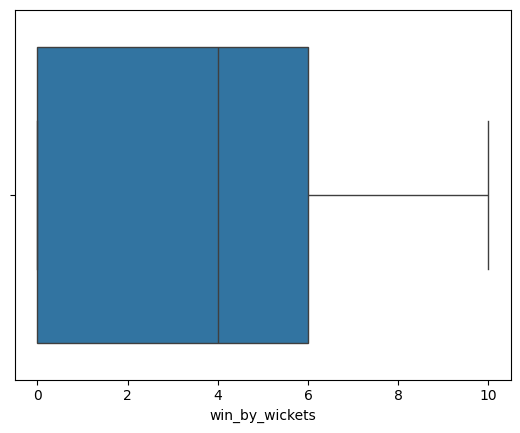

In [66]:
sns.boxplot(x='win_by_wickets',data=cricket_data)

 We can see 'id', 'dl_applied','win_by_runs', this columns have a outliers. 

# Removing Outlier

In [32]:
cricket_data=cricket_data[cricket_data['id'] < cricket_data['id'].quantile(0.99)]
cricket_data=cricket_data[cricket_data['dl_applied'] < cricket_data['dl_applied'].quantile(0.99)]
cricket_data=cricket_data[cricket_data['win_by_runs'] < cricket_data['win_by_runs'].quantile(0.99)]

<Axes: xlabel='id'>

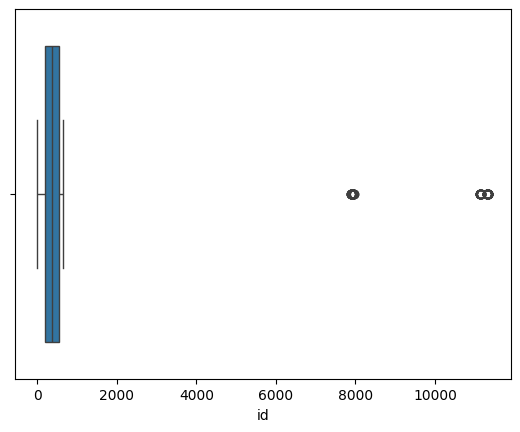

In [33]:
sns.boxplot(x='id',data=cricket_data)

<Axes: xlabel='dl_applied'>

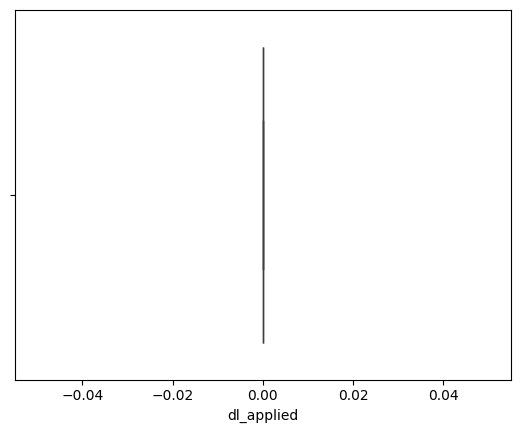

In [34]:
sns.boxplot(x='dl_applied',data=cricket_data)

<Axes: xlabel='win_by_runs'>

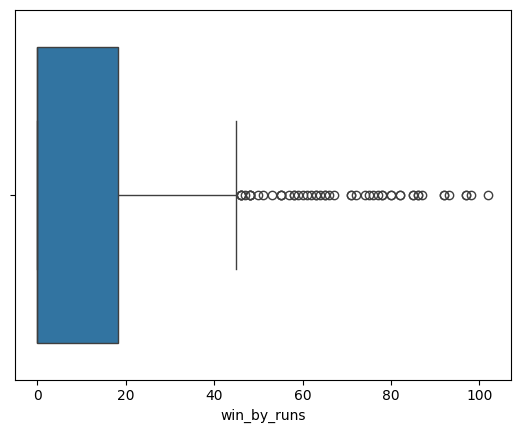

In [35]:
sns.boxplot(x='win_by_runs',data=cricket_data)

In [4]:
cricket_data.shape

(755, 18)

In [34]:
cricket_data['winner']= cricket_data['winner'].fillna(cricket_data['winner'].mode()[0])

In [35]:
cricket_data.isna().sum()

id                   0
season               0
city                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
year                 0
month                0
Day                  0
dtype: int64

In [36]:
cricket_data['winner'].value_counts()

winner
Mumbai Indians                 112
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [8]:
cricket_data['winner'].min(),cricket_data['winner'].max()

('Chennai Super Kings', 'Sunrisers Hyderabad')

# Exploratory Data Analysis

# Using Point plot 

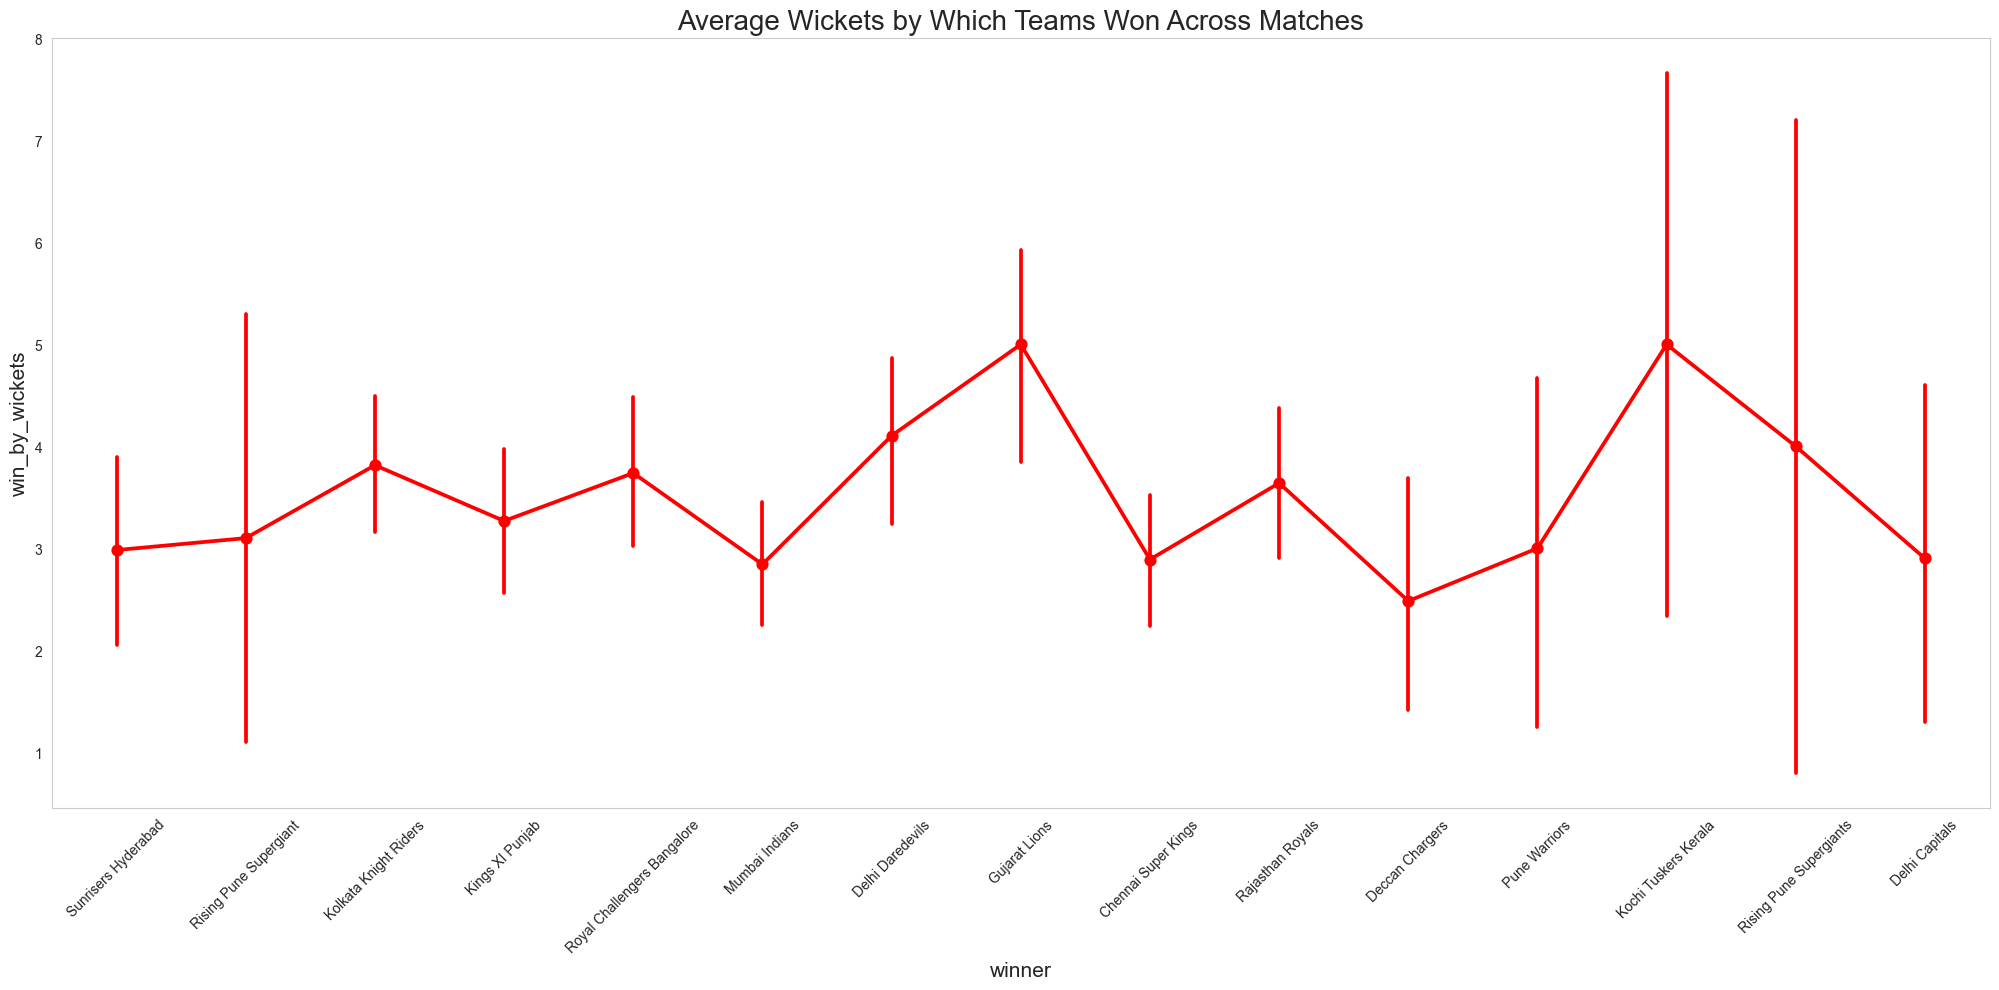

In [82]:
plt.figure(figsize=(25,10))
sns.pointplot(x= 'winner', y='win_by_wickets', data=cricket_data,color='r')
plt.title('Average Wickets by Which Teams Won Across Matches', fontsize=20)
plt.xlabel('winner', fontsize=15)
plt.ylabel('win_by_wickets', fontsize=15)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

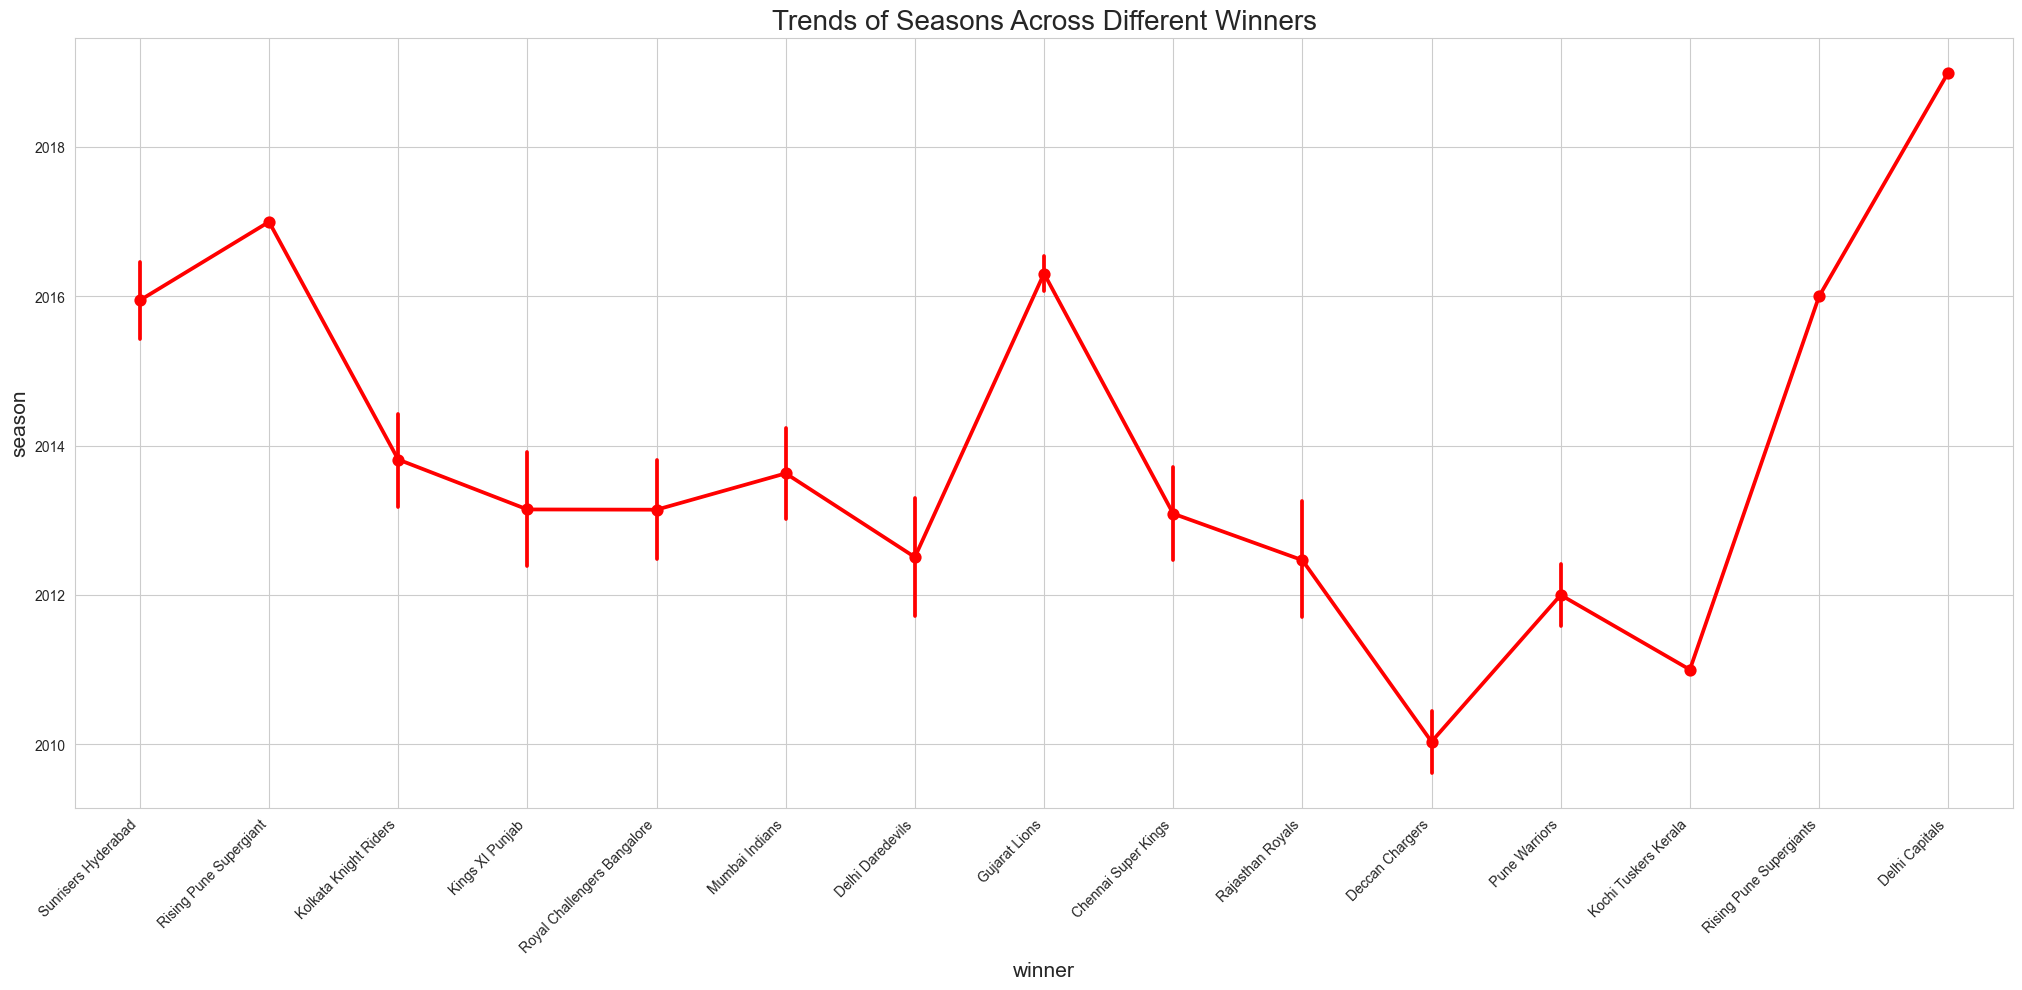

In [81]:
plt.figure(figsize=(25,10))
sns.pointplot(x= 'winner', y='season', data=cricket_data,color='r')
plt.title('Trends of Seasons Across Different Winners', fontsize=20)
plt.xlabel('winner', fontsize=15)
plt.ylabel('season', fontsize=15)
plt.grid(axis='x')
plt.xticks(rotation=45,ha='right')
plt.show()

# using bar plot

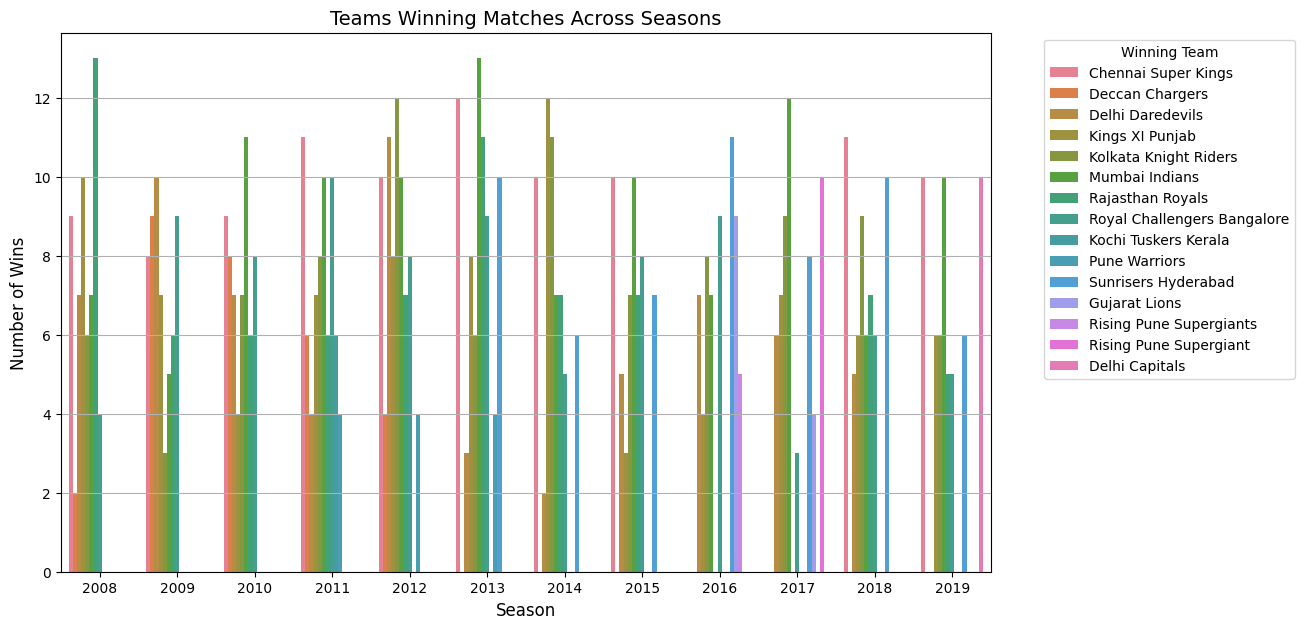

In [9]:
# Group by season and winner to count the number of wins per team per season
team_wins_by_season = cricket_data.groupby(['season', 'winner']).size().reset_index(name='win_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='season', y='win_count', hue='winner', data=team_wins_by_season)
plt.title('Teams Winning Matches Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.grid(axis='y')

plt.legend(title='Winning Team', bbox_to_anchor=(1.05, 1) )
plt.show()


Observation:- 

                 This graph creates a bar plot showing how many matches each team won in different seasons. It helps compare team performance across seasons visually.

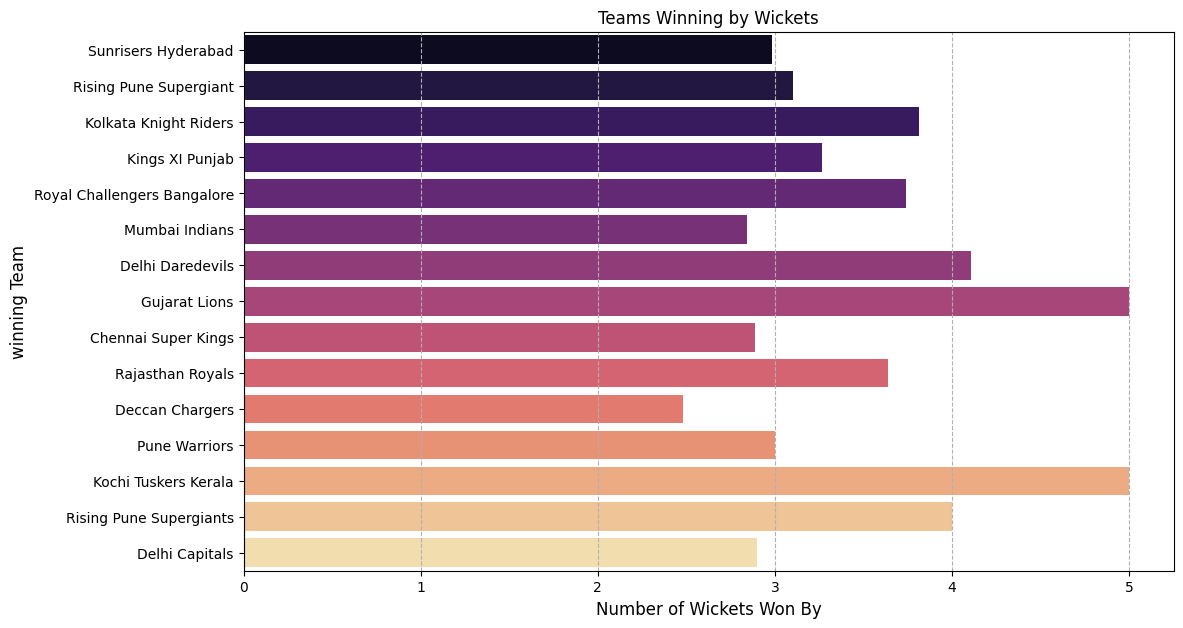

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='win_by_wickets', y='winner', data=cricket_data, palette= 'magma',ci=None) 
plt.title('Teams Winning by Wickets')
plt.xlabel('Number of Wickets Won By', fontsize=12) 
plt.ylabel('winning Team', fontsize=12)
plt.grid(axis='x',linestyle='--')
plt.show()

Obervation:- 

             This graph creates a bar plot showing how many wickets each team won by. 
             It highlights the teams' performance based on their winning margins in terms of wickets.

# Using line plot 

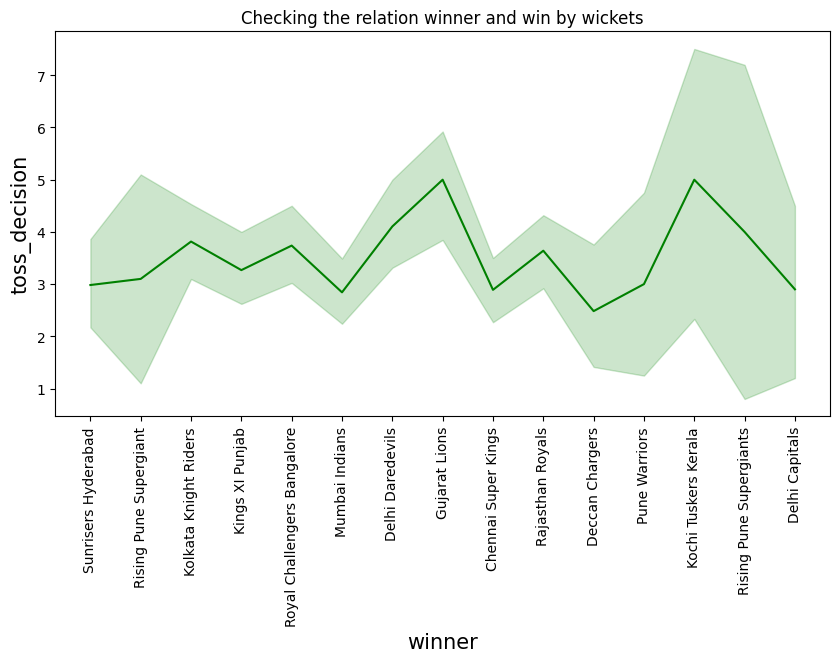

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='winner', y='win_by_wickets', data=cricket_data, color='green')
plt.title("Checking the relation winner and win by wickets")
plt.xlabel('winner', fontsize=15)
plt.ylabel('toss_decision', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Obervation:- 

            This graph creates a line plot to analyze the relationship between teams (winners) and the number of wickets they won by. 
            It helps visualize how different teams perform in terms of winning margins by wickets.

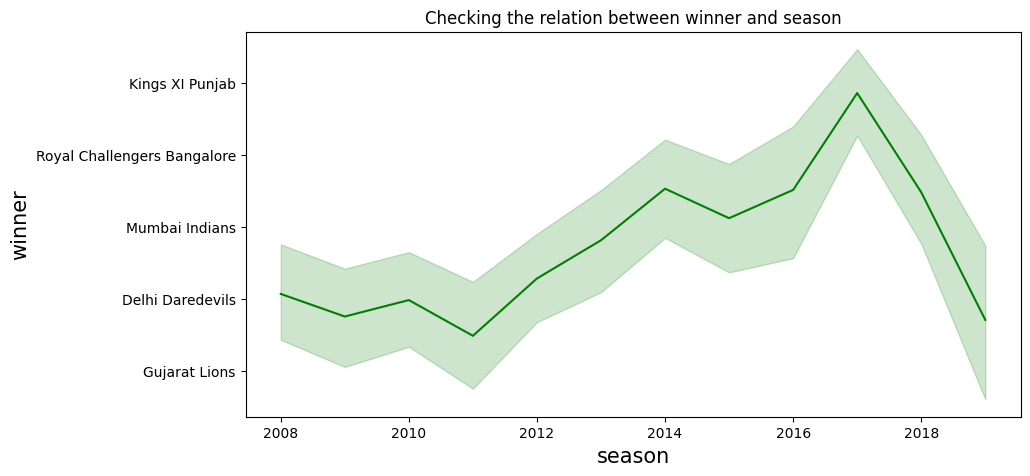

In [43]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='season', y='winner', data=cricket_data, color='green')
plt.title("Checking the relation between winner and season")
plt.xlabel('season', fontsize=15)
plt.ylabel('winner', fontsize=15)
plt.show()

Obervation:-

           The graph shows how the winner of each season changes over time in cricket. The line represents this trend across the seasons.

# Using count plot 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

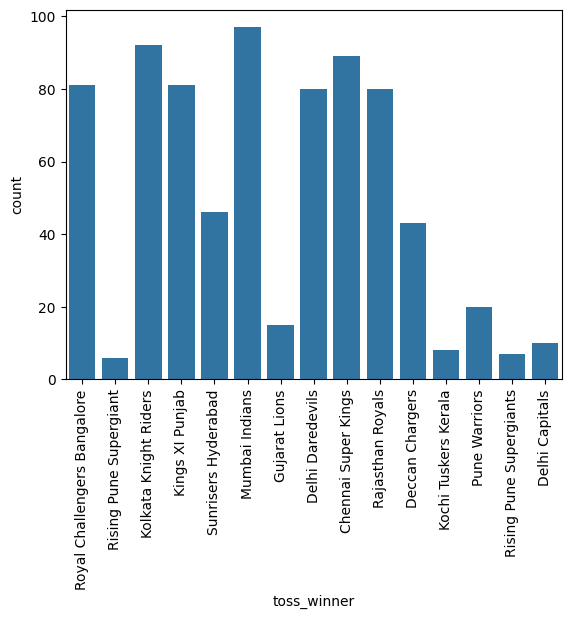

In [11]:
sns.countplot(x='toss_winner',data=cricket_data)
plt.xticks(rotation=90)

Obervation:-

          The plot shows how often each team won the toss. The team names on the x-axis are rotated to make them easier to read.

Text(0.5, 1.0, 'Count plot for Win By Wickets')

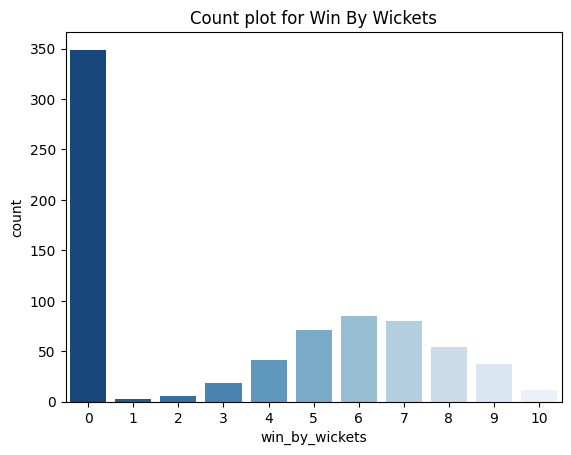

In [42]:
sns.countplot(x='win_by_wickets',data=cricket_data,palette='Blues_r')
plt.title('Count plot for Win By Wickets')

Obervation:-

            The plot shows how many matches were won by different wicket counts. The color palette is in shades of blue.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019')])

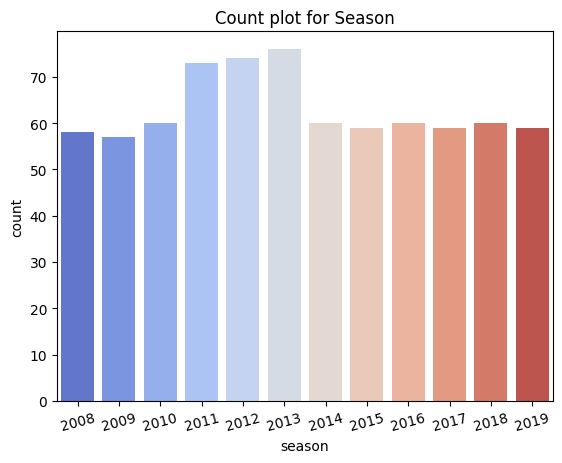

In [6]:
sns.countplot(x='season', data=cricket_data,palette= 'coolwarm')
plt.title('Count plot for Season')
plt.xticks(rotation=15)

Obervation:-

            The plot shows how many matches occurred in each season, with colors ranging from cool to warm. The season labels on the x-axis are slightly rotated for clarity.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

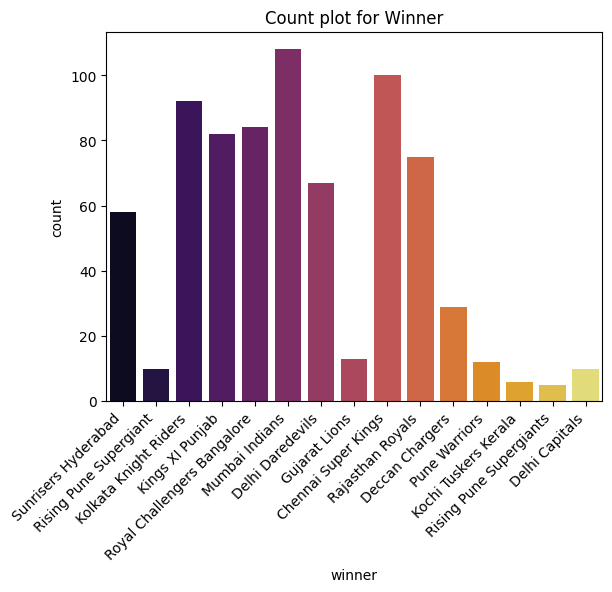

In [7]:
sns.countplot(x='winner', data=cricket_data,palette= 'inferno')
plt.title('Count plot for Winner')
plt.xticks(rotation=45,ha='right')

Observation:-

      The count plot shows Mumbai Indians and Chennai Super Kings have the highest number of wins, indicating dominance. 
      Teams like Kochi Tuskers Kerala and Rising Pune Supergiant have very few wins, showing limited success.

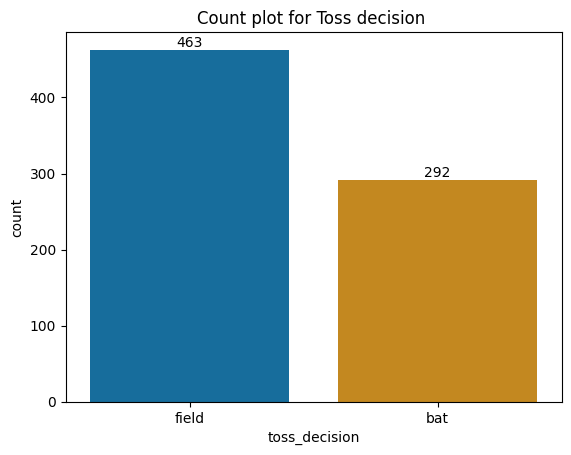

In [13]:
ax=sns.countplot(x='toss_decision',data=cricket_data,palette='colorblind')
plt.title('Count plot for Toss decision ')

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')

plt.show()

Observation :- 

              * From the Above graph.
              * Here we can clearly see that the most of the team Toss Decision is fielding. 

# Using Pie Plot

# Using Box Plot

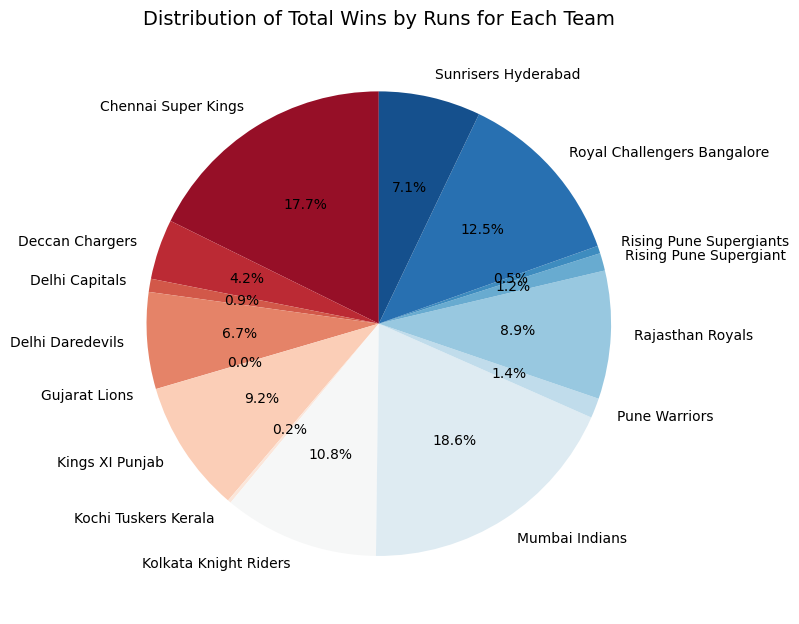

In [122]:
ipl = cricket_data.groupby('winner')['win_by_runs'].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(ipl, labels=ipl.index, autopct='%1.1f%%', colors=sns.color_palette('RdBu', len(ipl)), startangle=90)
plt.title('Distribution of Total Wins by Runs for Each Team', fontsize=14)
plt.tight_layout()
plt.show()

Observation :-

            The chart shows that Mumbai Indians and Chennai Super Kings dominate in winning matches by big margins. 
            Teams like Delhi Capitals and Kochi Tuskers Kerala have very few such wins, highlighting a clear difference in performance between teams.

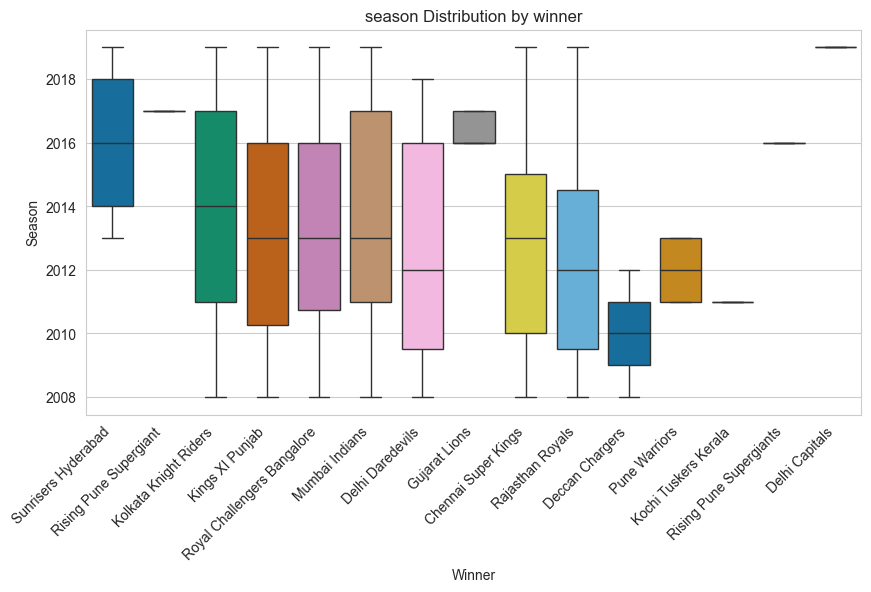

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x='winner',y='season',data=cricket_data,palette='colorblind')
plt.title('season Distribution by winner')
plt.xlabel('Winner',fontsize=10)
plt.ylabel('Season',fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.show()

Observation :-
    
     The boxplot shows teams like Mumbai Indians and Chennai Super Kings winning across many seasons, showing consistent success. 
     Teams like Kochi Tuskers Kerala and Rising Pune Supergiant won in only one season, showing limited success.

# Using Heatmap

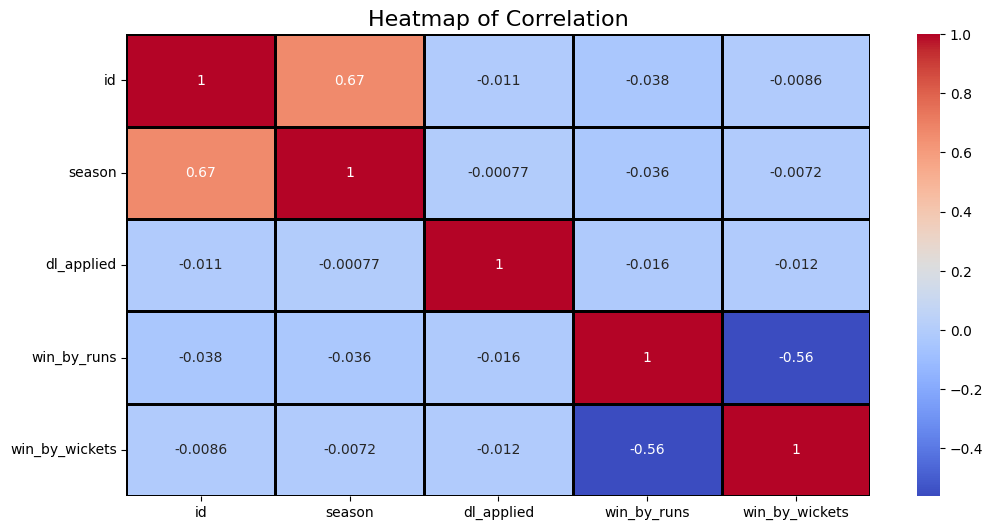

In [4]:
# Filter only numeric columns
numeric_data = cricket_data.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=2, linecolor='k', cmap='coolwarm')  # Change 'coolwarm' to any desired colormap
plt.title('Heatmap of Correlation', fontsize=16)
plt.show()